### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly as py
from mpl_toolkits.mplot3d import Axes3D

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
df = pd.read_csv('data/coupons.csv')

In [7]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [9]:
df.describe()
#df.shape
# there are 12600 records.  The avg temperature is 63, a bit on the low side.

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.info()
# Result: The following are numbers: tempreature, has_children, toCoupons, and Y.  No data column has null.  Good.  It also shows some useful columns may need to be turned into number, like age


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<Figure size 5000x1000 with 0 Axes>

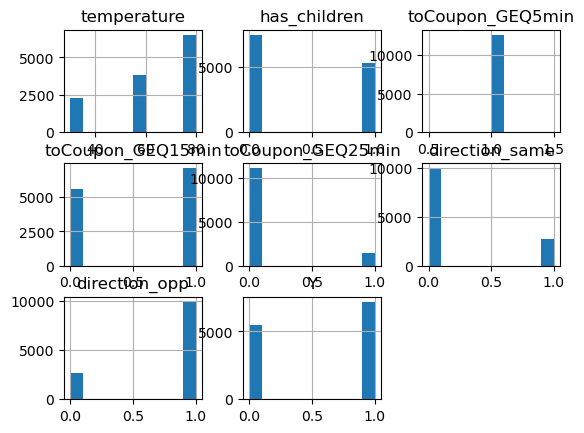

In [11]:
plt.figure(figsize=(50,10))
df.hist()
plt.title('Histogram of number factors')
plt.show()
# a summary of histogram.  It shows it may be difficult to get correlation.  We are "reading tea leafs". I did not take too much calorie to fix the titles
# since it is for my own exploration benefits only.

In [12]:
#sns.pairplot(df[['Y','has_children','temperature','expiration','gender','age','toCoupon_GEQ15min','toCoupon_GEQ25min']])
#does not seem to show any obvious correlation.

In [13]:
df.iloc[2]
# examine some typical record.  It looks like income, time and expiration needs to be turned into number columns

destination                      No Urgent Place
passanger                              Friend(s)
weather                                    Sunny
temperature                                   80
time                                        10AM
coupon                     Carry out & Take away
expiration                                    2h
gender                                    Female
age                                           21
maritalStatus                  Unmarried partner
has_children                                   1
education               Some college - no degree
occupation                            Unemployed
income                           $37500 - $49999
car                                          NaN
Bar                                        never
CoffeeHouse                                never
CarryAway                                    NaN
RestaurantLessThan20                         4~8
Restaurant20To50                             1~3
toCoupon_GEQ5min    

In [14]:
df.iloc[:,4]
#most likely I need to do a translation

0         2PM
1        10AM
2        10AM
3         2PM
4         2PM
         ... 
12679     6PM
12680     7AM
12681     7AM
12682     7AM
12683     7AM
Name: time, Length: 12684, dtype: object

In [15]:
df.iloc[:,8].sample(20)
#most likely I will take first two numbers

12555        26
5683         21
2448         21
2897         21
11803        36
10184        36
9974         21
5910         21
1113         41
5447     50plus
5866         26
1247         26
11464        41
10055    50plus
8285         21
6653         26
388          21
916          31
7542         36
6557     50plus
Name: age, dtype: object

In [16]:
df.iloc[:,12].sample(20)
#most likely I will take first two numbers

7953              Computer & Mathematical
4399         Life Physical Social Science
10871                Business & Financial
8350                      Sales & Related
9762           Education&Training&Library
871           Community & Social Services
5512           Education&Training&Library
1658              Personal Care & Service
626                               Student
8614      Office & Administrative Support
6382                           Management
3428      Office & Administrative Support
11048                     Sales & Related
5861          Community & Social Services
5586     Transportation & Material Moving
12313                          Unemployed
6071                           Unemployed
810               Computer & Mathematical
10680                          Unemployed
638       Office & Administrative Support
Name: occupation, dtype: object

In [17]:
df.iloc[:,13].sample(20)
#It will be interesting to get them into a number

968       $87500 - $99999
10247    Less than $12500
7156      $37500 - $49999
3509      $25000 - $37499
2115     Less than $12500
8412      $50000 - $62499
3883      $100000 or More
5692      $50000 - $62499
12169     $75000 - $87499
10057    Less than $12500
12030     $87500 - $99999
7056      $37500 - $49999
9334      $25000 - $37499
10145     $75000 - $87499
11468     $100000 or More
8852      $50000 - $62499
10605     $12500 - $24999
1547      $100000 or More
11935     $100000 or More
9640     Less than $12500
Name: income, dtype: object

3. Decide what to do about your missing data -- drop, replace, other...

In [19]:
# I will need to turn some columns into numbers, and explore the relation.  
# However, I don't know if there is really a strong correlation signal anywhere, since the amount of discount is now in the database


4. What proportion of the total observations chose to accept the coupon?



In [21]:
len(df.query('Y==1'))

7210

In [22]:
df.query('Y==1').shape[0]/len(df)
#56.8% accepted

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Plot of establishment types and acceptance')

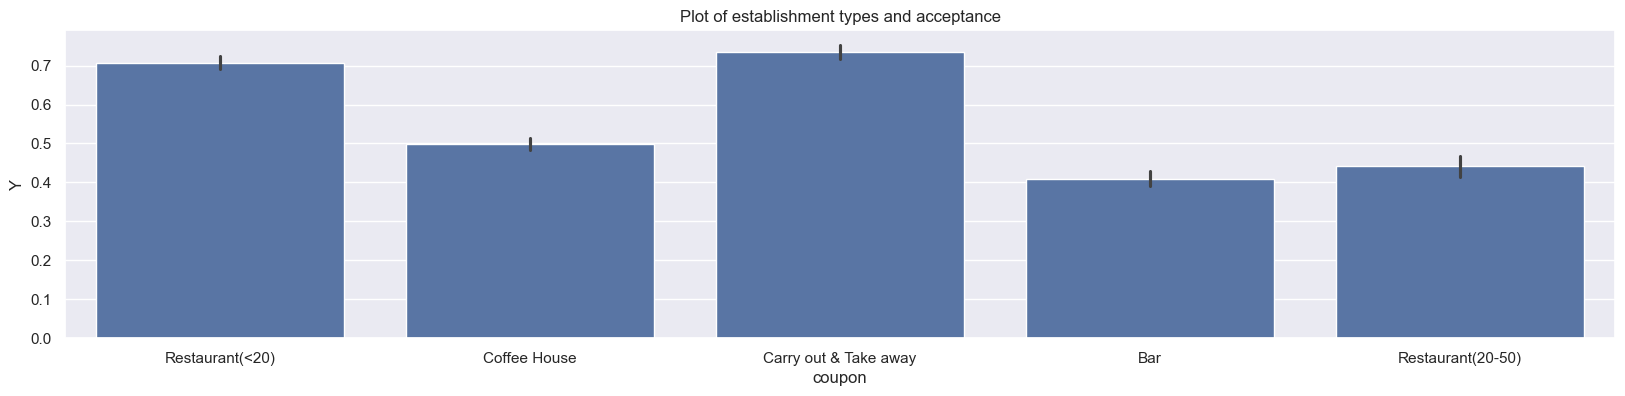

In [24]:
sns.set(rc={"figure.figsize":(20, 4)}) #width=3, #height=4
sns.barplot(data=df,x='coupon',y='Y')
plt.title('Plot of establishment types and acceptance')

6. Use a histogram to visualize the temperature column.

array([[<Axes: title={'center': 'temperature'}>]], dtype=object)

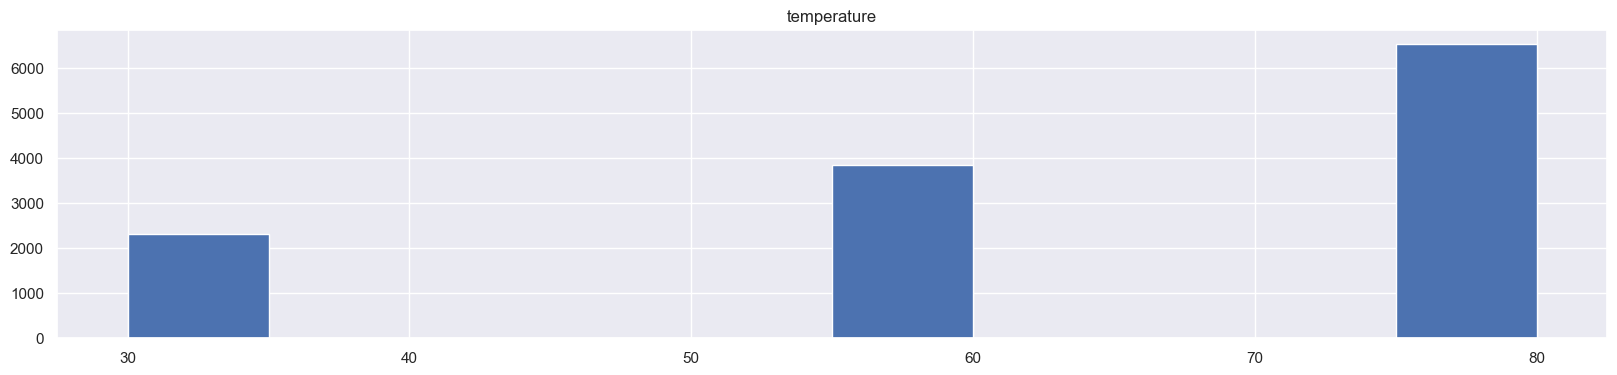

In [26]:
df.hist('temperature')
#histgram of temperature in general

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [28]:
df.iloc[:,15].sample(20)

6836     never
8761       1~3
6348     less1
9968     never
6851     never
5375       4~8
11650    less1
9675     never
8219     never
633      less1
1805       1~3
1939     less1
3599     less1
11235    less1
10970    less1
8941     never
4697     never
1951     less1
225        1~3
1508     never
Name: Bar, dtype: object

In [29]:
#dfbar=df.loc[df["Bar"]!="never"]
dfbar=df.loc[df["coupon"]=="Bar"]
dfbar.describe()
# a new dataframe for coupon offers from Bar

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,2017.000000,2017.000000,2017.0,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,57.590481,0.433813,1.0,0.663361,0.252851,0.209222,0.790778,0.410015
std,17.950408,0.495723,0.0,0.472677,0.434754,0.406854,0.406854,0.491958
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
dfbar.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9154,Work,Alone,Sunny,30,7AM,Bar,1d,Male,below21,Single,...,never,less1,never,NaN,1,1,0,1,0,0
9418,Work,Alone,Sunny,30,7AM,Bar,1d,Female,50plus,Divorced,...,never,4~8,1~3,less1,1,1,0,1,0,0
2152,Home,Alone,Sunny,55,6PM,Bar,1d,Female,36,Married partner,...,4~8,1~3,4~8,1~3,1,0,0,1,0,1
9876,Work,Alone,Rainy,55,7AM,Bar,1d,Male,36,Single,...,never,less1,less1,less1,1,1,1,0,1,1
7366,Home,Alone,Sunny,80,6PM,Bar,2h,Male,26,Married partner,...,NaN,1~3,1~3,less1,1,0,0,1,0,0


In [31]:
dfbar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  car                   13 non-null     object
 15  Bar                   1996 non-null   obje

In [32]:
dfbar.shape[0]/df.shape[0]

0.15901923683380637

2. What proportion of bar coupons were accepted?


In [34]:
dfbar.query("Y==1").shape
#there are 4443 records that related to Bar coupon

(827, 26)

In [35]:
dfbar.query('Y==1').shape[0]/len(dfbar)
#41 percent Bar coupons were accepted

0.41001487357461575

In [36]:
dfbar.query('Y==1').shape[0]/len(df)
#bar coupon use constitutes 5 percent of all coupon use

0.065200252286345

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [38]:
pd.set_option('display.max_columns', None) 
dfbar.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9256,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Male,26,Single,0,Graduate degree (Masters or Doctorate),Computer & Mathematical,$62500 - $74999,NaN,1~3,gt8,4~8,4~8,1~3,1,0,0,0,1,0
6280,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,31,Married partner,0,Some college - no degree,Computer & Mathematical,$100000 or More,NaN,less1,less1,gt8,4~8,1~3,1,0,0,0,1,1
6092,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Male,21,Unmarried partner,0,Some college - no degree,Food Preparation & Serving Related,$12500 - $24999,NaN,1~3,less1,1~3,1~3,never,1,0,0,0,1,1
9035,Home,Alone,Rainy,55,6PM,Bar,1d,Male,21,Single,0,Some college - no degree,Student,$12500 - $24999,NaN,1~3,less1,4~8,less1,never,1,1,1,0,1,0
4756,Home,Alone,Sunny,80,10PM,Bar,1d,Female,50plus,Single,0,Bachelors degree,Retired,$37500 - $49999,NaN,never,never,less1,4~8,less1,1,1,0,1,0,0


In [39]:
dfbar.query('Y==1' and ('Bar=="less1" or Bar=="1~3"')).sample(4)
dfbar.query('Y==1' and ('Bar=="less1" or Bar=="1~3"')).shape[0]

967

In [40]:
dfbar.query('Y==1' and ('Bar=="gt8" or Bar=="4~8"')).sample(4)
dfbar.query('Y==1' and ('Bar=="gt8" or Bar=="4~8"')).shape[0]

199

In [41]:
#acceptance rate for people to go to bar 3 times or less
print(dfbar.query('Y==1' and ('Bar=="less1" or Bar=="1~3"')).shape[0]/len(dfbar))
#acceptance rate for people who go to bar more heavily
print(dfbar.query('Y==1' and ('Bar=="gt8" or Bar=="4~8"')).shape[0]/len(dfbar))

0.47942488844819037
0.09866137828458106


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [43]:
dfbar.query(('Y==1') and ('Bar!="less1"') and ('age!="21"' or 'age!="below21"')).sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8702,No Urgent Place,Partner,Sunny,30,10AM,Bar,1d,Male,31,Married partner,0,Graduate degree (Masters or Doctorate),Business & Financial,$75000 - $87499,NaN,1~3,4~8,less1,4~8,less1,1,1,0,0,1,0
10423,Work,Alone,Rainy,55,7AM,Bar,1d,Female,26,Unmarried partner,0,Bachelors degree,Community & Social Services,$37500 - $49999,NaN,less1,never,1~3,less1,never,1,1,1,0,1,0
8810,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Male,36,Married partner,1,Graduate degree (Masters or Doctorate),Computer & Mathematical,$100000 or More,NaN,never,never,less1,1~3,1~3,1,1,0,0,1,1


In [44]:
dfbar.query('Y==1 and Bar!="less1" and age!="21" and age!="below21"').shape[0]
# count of people who goes to bars less, and older than 21.

397

In [45]:
#dfbar=df.loc[df["Bar"]!="never"]
print(dfbar.query('Y==1').shape[0])
len(dfbar.query('Y==1'))
# total number of accepts in the drivers from Bars

827


827

In [46]:
# It appears the population of interest used coupon 397 times.  The rest of Bar coupon users used coupon 827 times.  It appears there is a small difference

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [48]:
print(dfbar['age'].unique())
print(dfbar['Bar'].unique())
print(dfbar['passanger'].unique())
print(dfbar['maritalStatus'].unique())
print(dfbar['RestaurantLessThan20'].unique())
print(dfbar['income'].unique())
print(dfbar['occupation'].unique())
# a list so it is easier to find the unique values of different categorical features for me

['21' '46' '26' '31' '41' '50plus' '36' 'below21']
['never' 'less1' '1~3' 'gt8' nan '4~8']
['Kid(s)' 'Alone' 'Friend(s)' 'Partner']
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
['4~8' '1~3' 'less1' 'gt8' nan 'never']
['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupatio

In [49]:
dfbar.query('Y==1 and Bar!="less1" and passanger!="kid(s)" and occupation!="Farming Fishing & Forestry"').shape[0]

574

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [51]:
dfbar.query('Y==1 and Bar!="less1" and maritalStatus!="Widowed" and passanger!="Kid(s)"').shape[0]

537

In [52]:
dfbar.query('Y==1 and Bar!="less1" and age!="21" and age!="26" and age!="below21"').shape[0]

241

In [53]:
dfbar.query('Y==1 and income!="$25000 - $37499" and income!="Less than $12500" and RestaurantLessThan20!="1~3" and RestaurantLessThan20!="less1" and RestaurantLessThan20!="never"and RestaurantLessThan20!="nan"').shape[0]

267

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [55]:
#so far, the people who use the coupone least among the three comparison groups are those who go to bars once a month and under age 30.  
#The people most likely to say yes.  People who have passengers as kids and not widowed are least likely.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I will first generate codes to make age, income become numbers.  I will use the middle range if the entry is a range.  if the entry has only upper or lower limit, I will use the limit.
## for income I will first make income low and income high.
I discovered a few new methods not mentioned.  These include count plot, and composite query.  Using my own way I turned the income to a number variable.
1.	The income is categorical, not numerical.  I created a new column called incomelow. This contains numbers which is basically average of the range.
2.	Instead of “buying a coupon”, I want to see what type of coupon is best seller.
a.	Ideally I like to find what hour has best chance.
3.	I looked at histogram of coupon types, occupation and determined the following groups has the best rate of buying a coupon (any coupon)
a.	By occupation
b.	By income level


In [58]:
dfnew=df
# I want to add a new dataframe and not mess up the main data frame.

In [59]:
dfnew.sample(4)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
166,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,26,Single,0,Some college - no degree,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,gt8,gt8,gt8,1,0,0,0,1,0
7631,No Urgent Place,Partner,Rainy,55,10AM,Carry out & Take away,2h,Male,50plus,Unmarried partner,1,Associates degree,Transportation & Material Moving,$50000 - $62499,NaN,never,1~3,4~8,4~8,1~3,1,0,0,0,1,0
205,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,21,Single,0,Some college - no degree,Sales & Related,$100000 or More,NaN,less1,never,gt8,1~3,less1,1,0,0,0,1,0
1607,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,41,Married partner,1,Graduate degree (Masters or Doctorate),Architecture & Engineering,$100000 or More,NaN,less1,1~3,1~3,gt8,never,1,1,0,0,1,0


In [60]:
dfnew.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
dfnew.iloc[2,13]

'$37500 - $49999'

In [62]:
print(dfbar['income'].unique())

['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [63]:
#dfnew['incomelow']=dfnew['income']
def f(row):
    if row["income"] == '$75000 - $87499':
        val = 80000
    elif row["income"] == '$12500 - $24999':
        val = 20000
    elif row["income"] == '$50000 - $62499':
        val = 55000
    elif row["income"] == '$12500 - $24999':
        val = 20000
    elif row["income"] == '$37500 - $49999':
        val = 40000
    elif row["income"] == '$100000 or More':
        val = 100000
    elif row["income"] == '$87500 - $99999':
        val = 90000
    elif row["income"] == 'Less than $12500':
        val = 12500
    elif row["income"] == '$62500 - $74999':
        val = 40000
    elif row["income"] == '$25000 - $37499':
        val = 40000
    else:
        val = 999
    return val
dfnew['incomelow']=dfnew.apply(f,axis=1)
# code for turning categorical income to numbers.

In [64]:
dfnew.sample(5)
# A sample view, for my own benefits.

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,incomelow
8456,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(20-50),2h,Female,50plus,Married partner,1,Some college - no degree,Personal Care & Service,$87500 - $99999,NaN,never,gt8,less1,1~3,less1,1,1,0,0,1,0,90000
12211,Home,Alone,Snowy,30,10PM,Coffee House,2h,Female,26,Unmarried partner,1,Some college - no degree,Computer & Mathematical,$50000 - $62499,NaN,4~8,gt8,1~3,1~3,1~3,1,1,0,0,1,0,55000
5775,Home,Alone,Sunny,80,10PM,Restaurant(<20),2h,Female,41,Single,1,Associates degree,Sales & Related,$25000 - $37499,NaN,less1,less1,4~8,4~8,1~3,1,0,0,1,0,0,40000
4509,No Urgent Place,Partner,Sunny,80,2PM,Coffee House,2h,Female,36,Unmarried partner,0,Graduate degree (Masters or Doctorate),Legal,$62500 - $74999,NaN,1~3,gt8,4~8,gt8,1~3,1,0,0,0,1,1,40000
6481,Home,Alone,Sunny,80,6PM,Coffee House,1d,Male,41,Divorced,1,Bachelors degree,Sales & Related,$62500 - $74999,NaN,never,never,4~8,1~3,never,1,0,0,0,1,0,40000


In [65]:
dfnew['incomelow'] = dfnew['incomelow'].astype(int)

In [66]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

so far we turned income to number

Text(0.5, 1.0, 'Distribution of coupon use for different occupations')

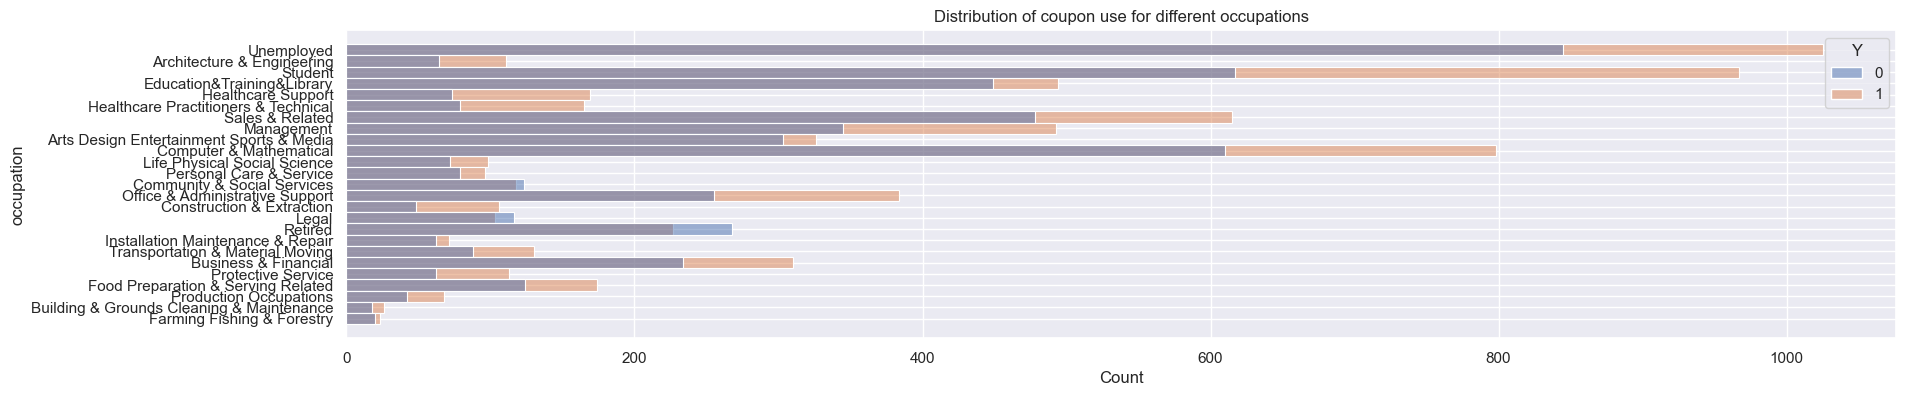

In [68]:
sns.histplot(data=dfnew, y='occupation',hue="Y")
# a qualitative histogram of driver occupation distributed by coupone acceptance.  
plt.title('Distribution of coupon use for different occupations')

In [69]:
#which type of coupon is most popular?
dfnew.groupby('coupon').size()

coupon
Bar                      2017
Carry out & Take away    2393
Coffee House             3996
Restaurant(20-50)        1492
Restaurant(<20)          2786
dtype: int64

In [70]:
dfnew.groupby('destination').size()

destination
Home               3237
No Urgent Place    6283
Work               3164
dtype: int64

Text(0.5, 1.0, 'Numerical income hist gram')

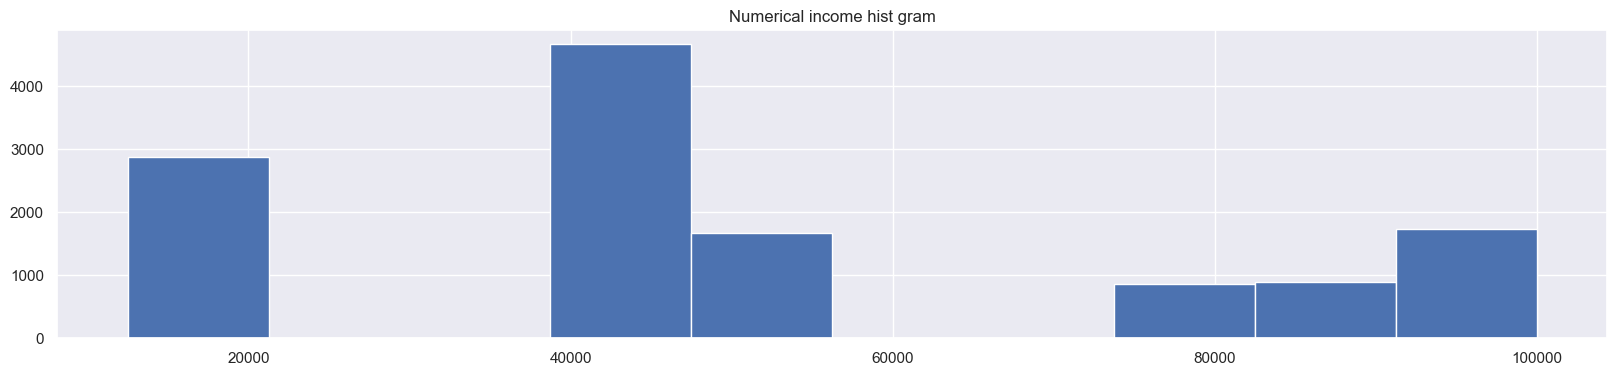

In [71]:
df.hist('incomelow')
plt.title('Numerical income hist gram')

In [72]:
dfbar.query('Y==1 and coupon=="Bar"').shape[0]

827

Text(0.5, 1.0, 'Distributino of coupon types vs accptance')

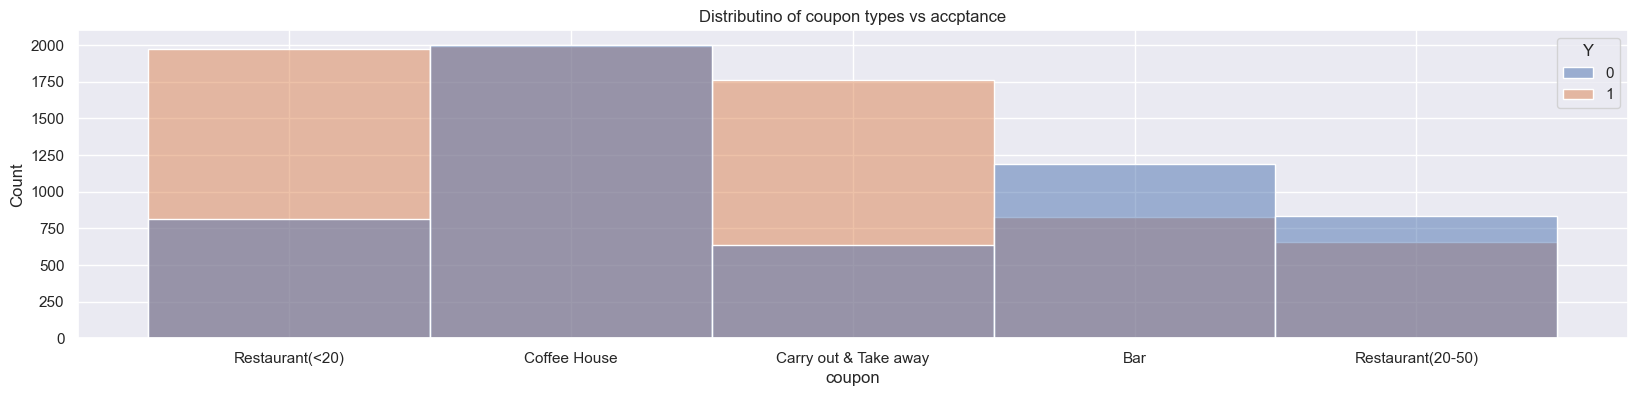

In [73]:
sns.histplot(data=dfnew,x='coupon',hue='Y')
plt.title('Distributino of coupon types vs accptance')

Text(0.5, 1.0, 'Distribution of establishment types by acceptance')

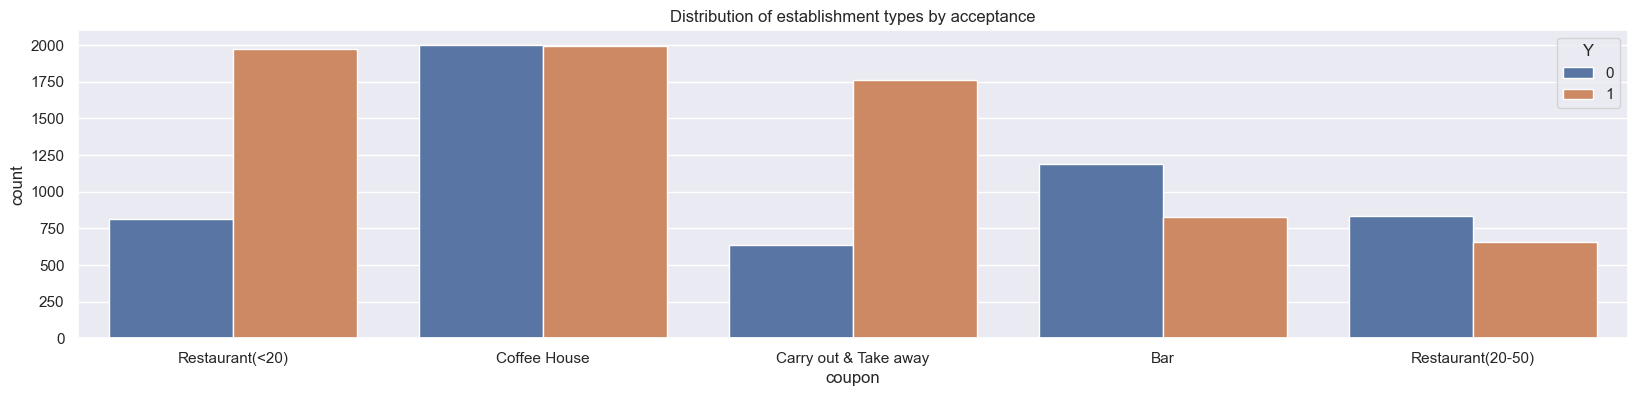

In [74]:
sns.countplot(data=dfnew,x='coupon',hue='Y')
plt.title('Distribution of establishment types by acceptance')

Text(0.5, 1.0, 'Distribution of driver destnation intent by acceptance')

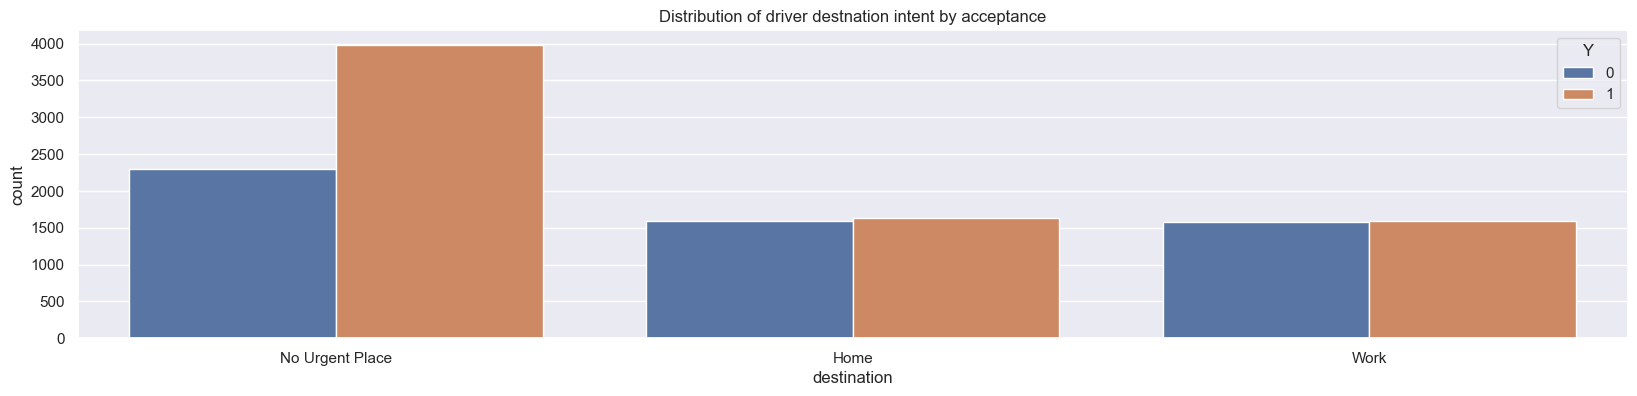

In [75]:
sns.countplot(data=df,x='destination',hue='Y')
plt.title('Distribution of driver destnation intent by acceptance')

Text(0.5, 1.0, 'Distribution of education with respect to acceptance')

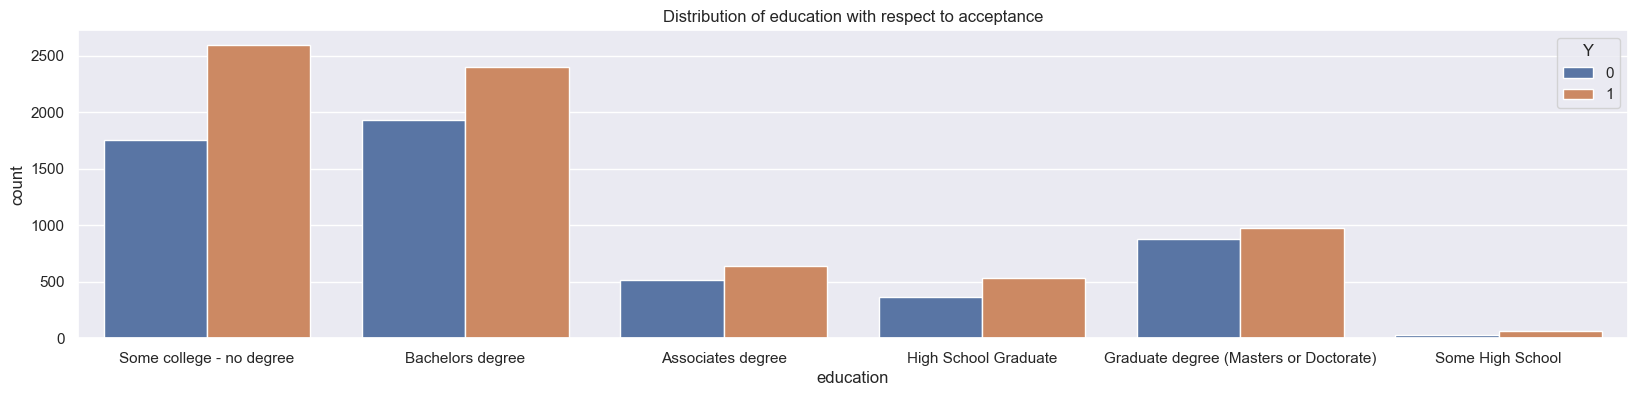

In [76]:
sns.countplot(data=df,x='education',hue='Y')
plt.title('Distribution of education with respect to acceptance')

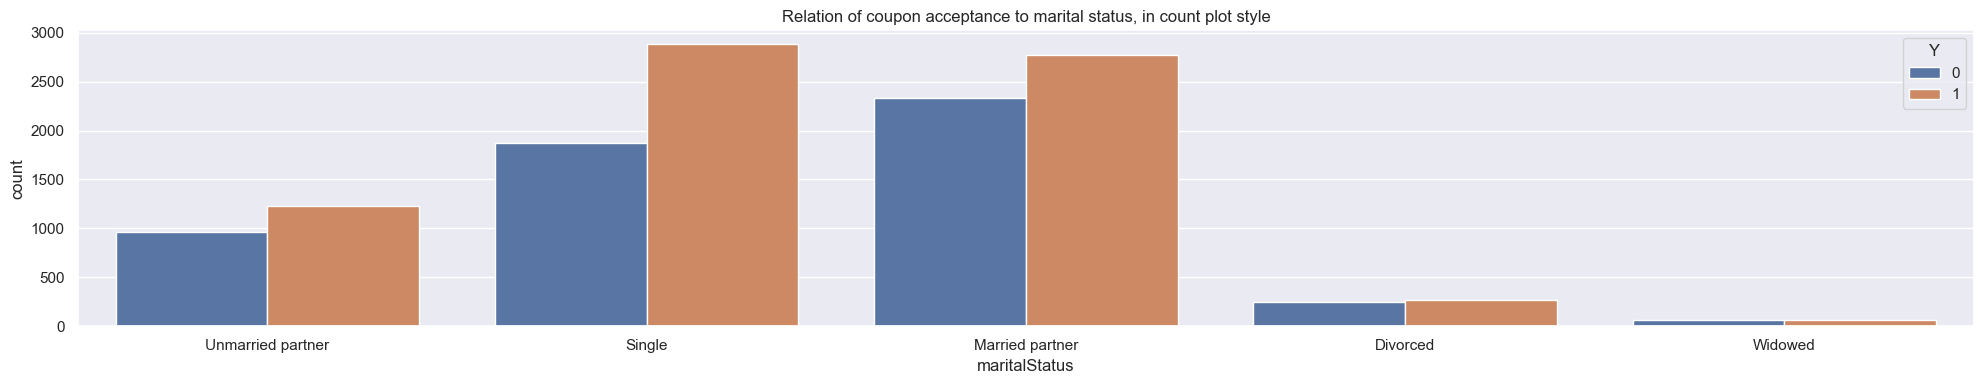

In [77]:
figure=sns.countplot(data=df,x="maritalStatus",hue='Y').set(title="Relation of coupon acceptance to marital status, in count plot style")
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Relation of coupon acceptance to marital status, in histogram style')]

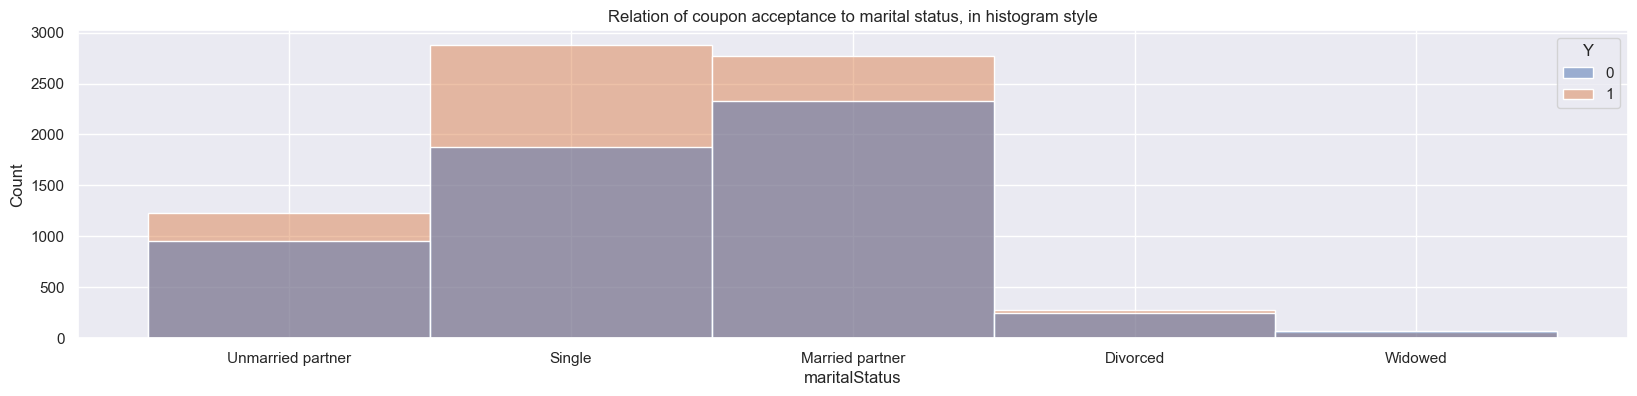

In [78]:
sns.histplot(data=df,x="maritalStatus",hue='Y').set(title="Relation of coupon acceptance to marital status, in histogram style") 

Text(0.5, 1.0, 'Distribution of income with respect to acceptance of coupons')

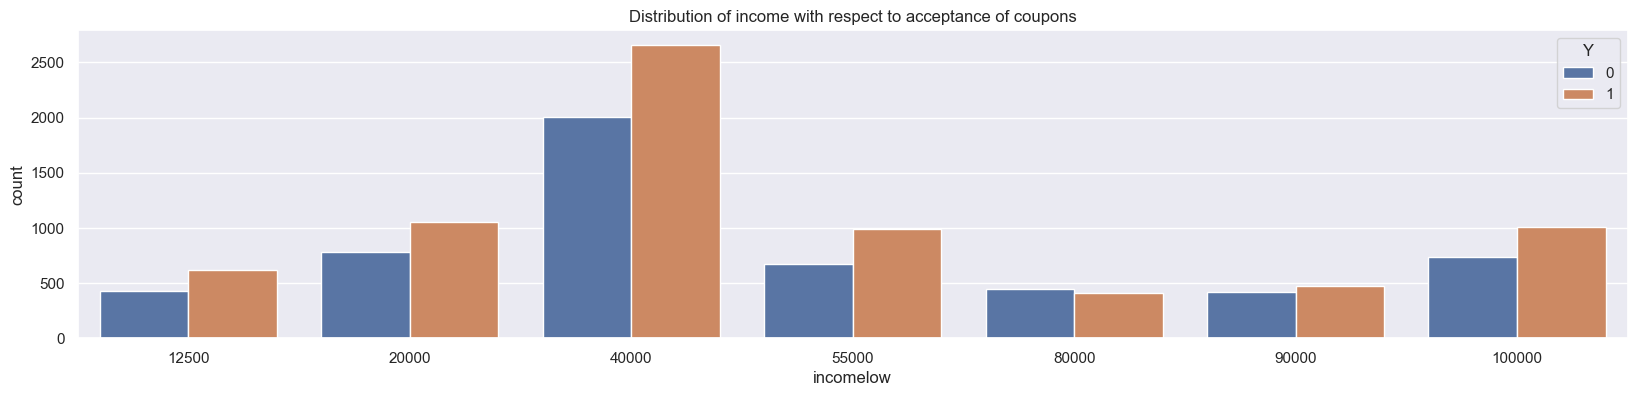

In [79]:
sns.countplot(data=df,x="incomelow",hue='Y')
plt.title('Distribution of income with respect to acceptance of coupons')

Text(0.5, 1.0, 'Relation or no relation of income level and temperature on the day of survey')

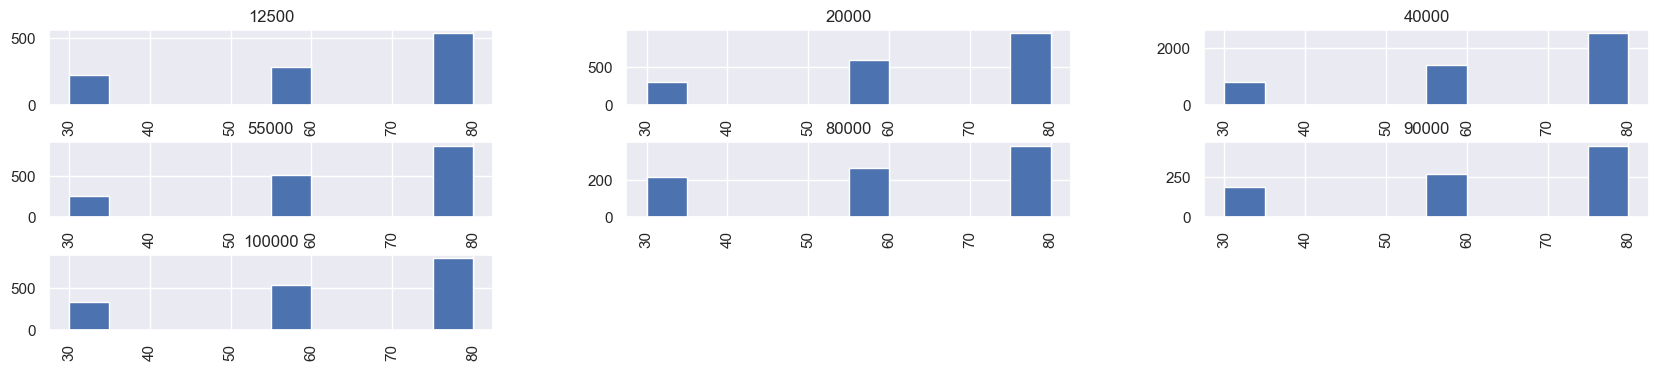

In [80]:
dfnew.hist('temperature','incomelow','Y')
plt.title('Relation or no relation of income level and temperature on the day of survey')
# this is a big picture survey of histogram based on temperature and income leverl.  It is an unusual combination.  Temperature and income for the 
# driver samples seem to have no connection.  I was hoping to see some signal, for example maybe high income drivers are skewed.  But it does not seem likely.

Text(0.5, 1.0, 'Visualization of income level and temperature on the day of survey')

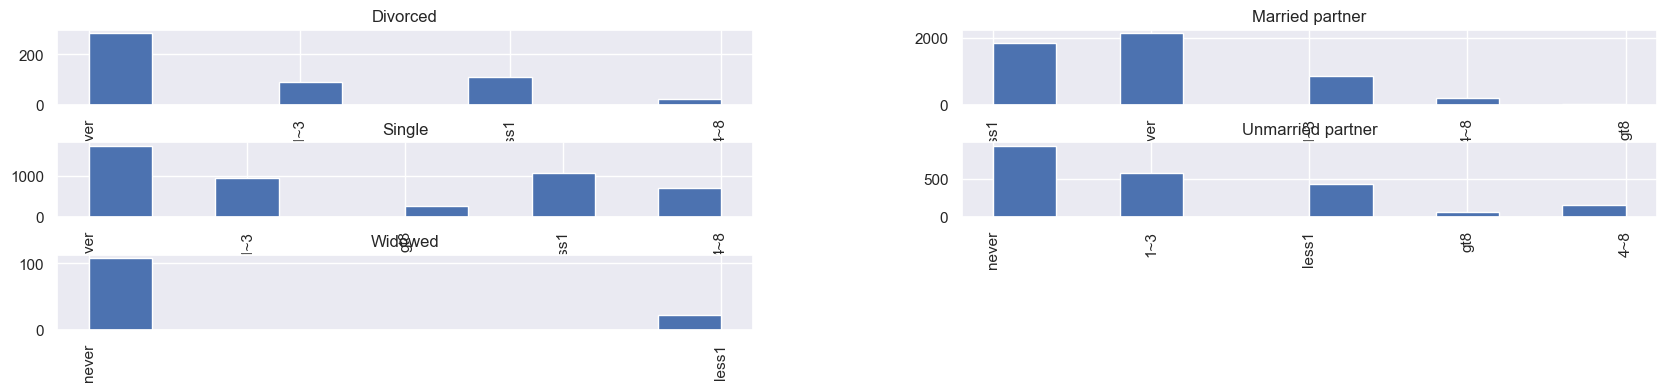

In [81]:
dfnew.hist('Bar','maritalStatus','Y')
plt.title('Visualization of income level and temperature on the day of survey')
# this is a big picture survey of histogram based on both bar and marital status.